### 套索回归【alpha大小对结果影响】

In [1]:
import matplotlib.pyplot as plt
import numpy as np

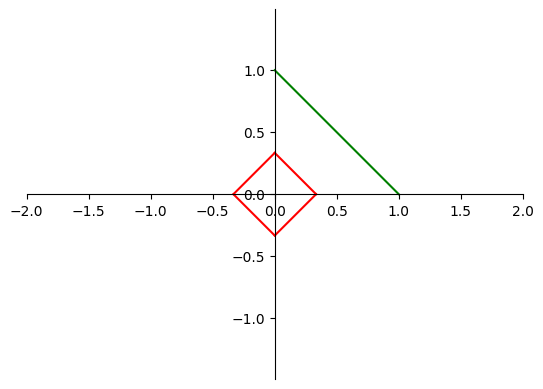

In [2]:
# 只绘制第一象限，假设 1 = α*（）
# α的值是1   
# 1 = x + y  # w1 + w2
# y = 1 -x
f = lambda x : 1- x
x = np.linspace(0,1,100)
plt.axis('equal')
plt.plot(x, f(x), color = 'green')

# α 的值是：3
# 1 = 3 * x + 3 * y
# y = 1/3 -x
f2 = lambda x : 1/3 - x 
x2 = np.linspace(0,1/3,100)
plt.plot(x2, f2(x2),color = 'red')

# 1 = -3 * x + 3 * y
# y = 1/3 + x
f2 = lambda x : 1/3 + x 
x2 = np.linspace(-1/3,0,100)
plt.plot(x2,f2(x2),color = 'red')

# 1 = -3 * x - 3 * y
# y = -1/3 - x
f2 = lambda x : -1/3 - x 
x2 = np.linspace(-1/3,0,100)
plt.plot(x2,f2(x2),color = 'red')

# 1 = 3 * x - 3 * y
# y = -1/3 + x
f2 = lambda x : -1/3 + x 
x2 = np.linspace(0,1/3,100)
plt.plot(x2,f2(x2),color = 'red')

# 一些列设置
plt.xlim(-2,2)
plt.ylim(-2,2)
ax = plt.gca()
ax.spines['right'].set_color('None')  # 将图片的右框隐藏
ax.spines['top'].set_color('None')  # 将图片的上边框隐藏
ax.spines['bottom'].set_position(('data', 0)) # x轴出现在y轴的-1 位置
ax.spines['left'].set_position(('data', 0))

### Lasso回归公式

<font size = 18>$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$</font>

### 岭回归公式

<font size = 18>$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$</font>

### 代码演示Lasso套索回归使用

什么时候使用Lasso回归：  
- 特征冗余，如特征200多个，使用Lasso回归把一些特征的权重衰减到0
- 防止过拟合  

什么时候使用普通SGDRegressor：
- 一般问题，没有特征冗余
- 没有过拟合问题

#### Lasso套索回归

In [3]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor

In [4]:
# 1、创建数据集X，y
X = 2*np.random.rand(100, 20)
w = np.random.randn(20,1) # 随机生成的系数，正态分布
b = np.random.randint(1,10,size = 1)
y = X.dot(w) + b + np.random.randn(100, 1)

print('原始方程的斜率：',w.ravel())
print('原始方程的截距：',b)
# 这是真实答案

原始方程的斜率： [ 0.88895193  1.22789004  0.40080718  1.57522539 -1.89840708  0.44115019
 -1.11324901  1.61478837  0.61445601  1.56382859 -0.02806955 -0.4287223
  0.7878842  -1.4401645  -1.99202802 -0.63358862  0.09349938  0.35151361
 -0.08474652 -1.21604684]
原始方程的截距： [3]


In [5]:
lasso = Lasso(alpha= 0.2) # alpha = 0相当于普通的线性回归，正则项没有了
lasso.fit(X, y)
print('套索回归求解的斜率：',lasso.coef_)
print('套索回归求解的截距：',lasso.intercept_)
# 正则化，防止过拟合
# 具体数据体现：系数缩小，一部分被缩小到0

套索回归求解的斜率： [ 0.07372228  0.45023307  0.          0.78077411 -1.31196081  0.
 -0.33581643  1.26663785  0.          1.22980033 -0.         -0.03890531
  0.33597893 -0.43269881 -0.89654805 -0.45110998  0.          0.
 -0.         -0.52543228]
套索回归求解的截距： [3.71338437]


In [6]:
lasso = Lasso(alpha= 1) # alpha = 0相当于普通的线性回归
lasso.fit(X, y) 
print('套索回归求解的斜率：',lasso.coef_)
print('套索回归求解的截距：',lasso.intercept_)
# 正则化，防止过拟合
# 具体数据体现：系数缩小，一部分被缩小到0

套索回归求解的斜率： [ 0.  0.  0.  0. -0.  0. -0.  0.  0.  0. -0. -0.  0. -0. -0. -0.  0.  0.
 -0. -0.]
套索回归求解的截距： [4.01309617]


#### 线性回归梯度下降SGDRegressor

In [7]:
# 线性回归梯度下降方法
# 随机梯度下降
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(penalty='l1',alpha=0,eta0=0.05,max_iter=10000,learning_rate = 'constant')
sgd.fit(X, y.reshape(-1,))
print('随机梯度下降求解的斜率是：',sgd.coef_)
print('随机梯度下降求解的截距是：',sgd.intercept_)

随机梯度下降求解的斜率是： [ 1.01989441  1.19459951 -0.01574583  1.51133019 -1.98320753  0.76722946
 -0.94636816  1.84344744  0.70729784  1.97330137  0.33078375 -0.39676245
  0.5681757  -1.54732468 -2.02042127 -0.51950215  0.1823495   0.13984088
 -0.30459975 -1.44791626]
随机梯度下降求解的截距是： [1.7113744]


#### 对比LinearRegression 

In [29]:
from sklearn.linear_model import LinearRegression 

# 正规方程，进行的求解
# 和梯度下降，完全不同的方式

### Ridge岭回归代码演示使用

什么时候使用Ridge岭回归：
- 出现过拟合
- 特征冗余，需要筛选特征，根据coefficient比较小，可以删除相应的特征   

什么时候使用一般LinearRegression：
- 一般不用，除非问题特别简单

#### Ridge岭回归

In [8]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

# 1、创建数据集X，y
X = 2*np.random.rand(100, 5)
w = np.random.randint(1,10,size = (5,1))
b = np.random.randint(1,10,size = 1)
y = X.dot(w) + b + np.random.randn(100, 1)

print('原始方程的斜率：',w.ravel())
print('原始方程的截距：',b)

原始方程的斜率： [9 2 3 4 1]
原始方程的截距： [2]


In [9]:
ridge = Ridge(alpha= 1, solver='sag') # 'sag' uses a Stochastic Average Gradient descent
ridge.fit(X, y)
print('岭回归求解的斜率：',ridge.coef_)
print('岭回归求解的截距：',ridge.intercept_)
# 对比原方程，这里求解的结果有一个下降趋势
# 权重变低了，一定程度上防止过拟合

岭回归求解的斜率： [[8.39936516 1.98397157 2.96550306 3.74278113 0.80272275]]
岭回归求解的截距： [3.14880391]


#### 线性回归梯度下降SGDRegressor

In [12]:
# 线性回归梯度下降方法
sgd = SGDRegressor(penalty='l2',alpha=0.0001,eta0=0.1)
sgd.fit(X, y.reshape(-1,))
print('随机梯度下降求解的斜率是：',sgd.coef_)
print('随机梯度下降求解的截距是：',sgd.intercept_)

随机梯度下降求解的斜率是： [8.56620419 1.97100028 3.06263096 3.80988078 0.80881628]
随机梯度下降求解的截距是： [2.69623426]


#### 对比LinearRegression

In [11]:
# 使用正规方程
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)
print('正规方程系数：',model.coef_)
print('正规方程截距：',model.intercept_)

正规方程系数： [[8.63653233 2.01943267 3.08586879 3.82393712 0.85318268]]
正规方程截距： [2.5880882]


In [10]:
ridge = Ridge(alpha= 0, solver='sag')  # 不加正则项，结果类似正规方程的解
ridge.fit(X, y)
print('岭回归求解的斜率：',ridge.coef_)
print('岭回归求解的截距：',ridge.intercept_)

岭回归求解的斜率： [[8.63627885 2.01958827 3.08580101 3.823819   0.8534682 ]]
岭回归求解的截距： [2.58815144]


### 弹性网络代码演示

#### ElasticNet

In [13]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

# 1、创建数据集X，y
X = 2*np.random.rand(100, 20) # 20个特征
w = np.random.randn(20,1)
b = np.random.randint(1,10,size = 1)
y = X.dot(w) + b + np.random.randn(100, 1)

print('原始方程的斜率：',w.ravel())
print('原始方程的截距：',b)

原始方程的斜率： [ 0.36176756  1.93756756  0.05576597  0.40298604 -1.12446031  1.08983435
 -1.38747671  0.9604531   0.17410098 -0.47016883 -0.80412702  0.18518081
 -1.58501795 -0.41893187  0.62719645  0.67846607  0.04675234  0.01354382
  0.38972612  0.23754304]
原始方程的截距： [2]


In [14]:
# 对比一下l1_ratio
model = ElasticNet(alpha= 1, l1_ratio = 0.7)
model.fit(X, y)
print('弹性网络回归求解的斜率：',model.coef_)
print('弹性网络回归求解的截距：',model.intercept_)

弹性网络回归求解的斜率： [ 0.  0.  0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0. -0.  0.  0. -0. -0.
  0. -0.]
弹性网络回归求解的截距： [3.3465895]


In [15]:
model = ElasticNet(alpha= 1, l1_ratio = 0.1)
model.fit(X, y)
print('弹性网络回归求解的斜率：',model.coef_)
print('弹性网络回归求解的截距：',model.intercept_)

弹性网络回归求解的斜率： [ 0.12556813  0.37622938  0.03531726  0.         -0.08639557  0.19949014
 -0.14244506  0.13680631  0.0480925  -0.03118003 -0.          0.
 -0.4069032  -0.06043526  0.00521301  0.         -0.         -0.
  0.10514435 -0.        ]
弹性网络回归求解的截距： [3.07301232]


#### SGDRegressor

In [16]:
# 线性回归梯度下降方法
sgd = SGDRegressor(penalty='elasticnet',alpha=0.01, l1_ratio=0.5)
sgd.fit(X, y.reshape(-1,))
print('随机梯度下降求解的斜率是：',sgd.coef_)
print('随机梯度下降求解的截距是：',sgd.intercept_)

随机梯度下降求解的斜率是： [ 0.78074569  1.69921311  0.23223792  0.32729637 -0.54805828  0.90953105
 -1.00167562  0.81202515  0.29360939 -0.3261801  -0.36225945  0.31398104
 -1.44628729 -0.36156749  0.51296104  0.38006713  0.04763394 -0.02422936
  0.67535295  0.04191144]
随机梯度下降求解的截距是： [0.3625131]


### 多项式实战 正规方程

In [ ]:
# LinearRegression 
# 正规方程，没有进行梯度下降，不会出现有的特征找最优解找得快，有的慢
# 所以可以不进行归一化

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # 正规方程，没有进行梯度下降

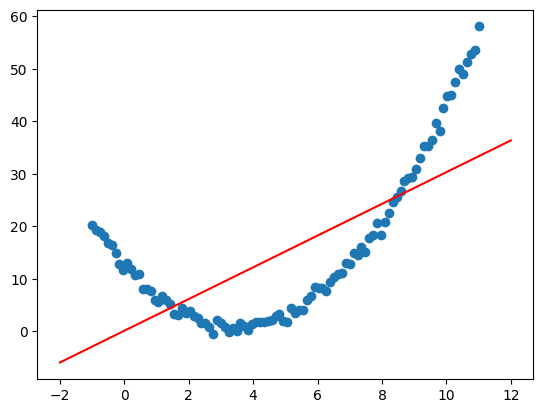

In [20]:
# 1、创建数据，并进行可视化
X = np.linspace(-1,11,num = 100)
y = (X - 5)**2 + 3*X -12 + np.random.randn(100)
X = X.reshape(-1,1)  # x只有一列
plt.scatter(X,y)

# 2、创建预测数据
X_test = np.linspace(-2,12,num = 200).reshape(-1,1)

# 3、不进行升维 + 正规方程线性回归
model_1 = LinearRegression()
model_1.fit(X,y)
y_test_1 = model_1.predict(X_test)
plt.plot(X_test,y_test_1,color = 'red')

In [ ]:
## 红色线欠拟合

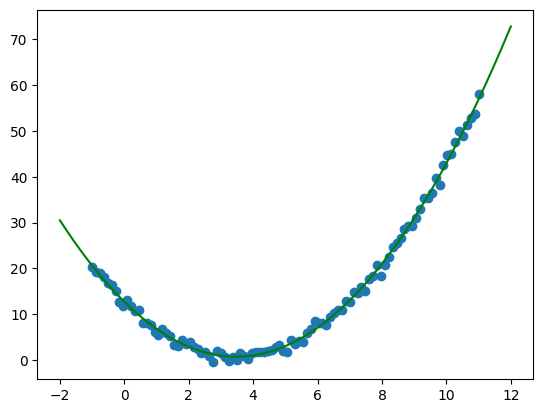

In [21]:
# # 1、创建数据，并进行可视化
# X = np.linspace(-1,11,num = 100)
# y = (X - 5)**2 + 3*X -12 + np.random.randn(100)
# X = X.reshape(-1,1)
plt.scatter(X,y)

# 4、多项式升维 + 正规方程线性回归
# 画龙点睛之步
X = np.concatenate([X,X**2],axis = 1) # 升维，特征变多，多了一列，平方
model_2 = LinearRegression()
model_2.fit(X,y)

# 5、测试数据处理，并预测
X_test = np.concatenate([X_test,X_test**2],axis = 1)  # 增加了一列特征，测试数据也要增加一列
y_test_2 = model_2.predict(X_test) #预测

# 6、数据可视化，切片操作
plt.plot(X_test[:,0],y_test_2,color = 'green')  # X中第一列才是原始数据，画线用的横坐标

### 多项式实战【2.0】SGDRegressor

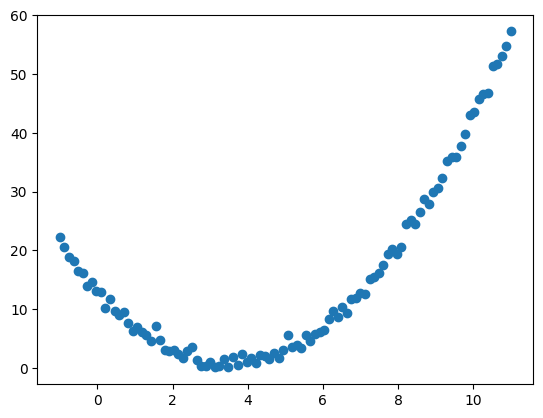

In [22]:
# import numpy as np
# import matplotlib.pyplot as plt
# # PolynomialFeatures 多项式特征
# from sklearn.preprocessing import PolynomialFeatures,StandardScaler # 标准化
# from sklearn.linear_model import SGDRegressor # 梯度下降的线性回归

# # 1、创建数据，并进行可视化
# X = np.linspace(-1,11,num = 100)
# y = (X - 5)**2 + 3*X -12 + np.random.randn(100)
# X = X.reshape(-1,1)
# plt.scatter(X,y)

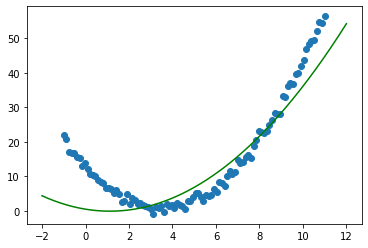

In [78]:
import numpy as np
import matplotlib.pyplot as plt
# PolynomialFeatures 多项式特征
from sklearn.preprocessing import PolynomialFeatures,StandardScaler # 标准化
from sklearn.linear_model import SGDRegressor # 梯度下降的线性回归

# 1、创建数据，并进行可视化
X = np.linspace(-1,11,num = 100)
y = (X - 5)**2 + 3*X -12 + np.random.randn(100)
X = X.reshape(-1,1)
plt.scatter(X,y)

# 2、创建预测数据
X_test = np.linspace(-2,12,num = 200).reshape(-1,1)

# 3、使用PolynomialFeatures进行特征升维
poly = PolynomialFeatures()
poly.fit(X,y)
X = poly.transform(X)

model = SGDRegressor(penalty='l2',eta0 = 0.0001,max_iter=100000,learning_rate='constant')
model.fit(X,y)

# 4、预测数据
X_test = poly.transform(X_test)
y_test = model.predict(X_test)
plt.plot(X_test[:,1],y_test,color = 'green')

In [ ]:
# 没有归一化，欠拟合

#### 对比是否归一化的结果

In [ ]:
# 使用了梯度下降，需要进行归一化

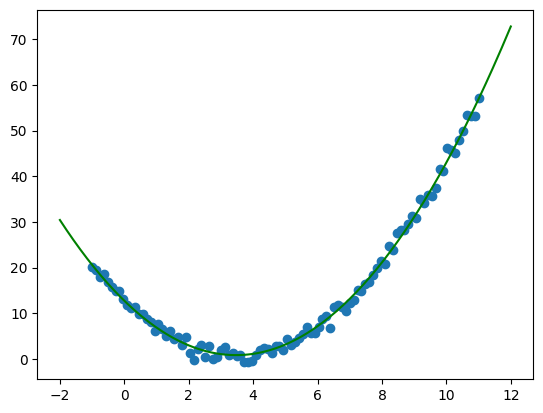

In [28]:
import numpy as np
import matplotlib.pyplot as plt
# PolynomialFeatures 多项式特征
from sklearn.preprocessing import PolynomialFeatures,StandardScaler # 标准化
from sklearn.linear_model import SGDRegressor # 梯度下降的线性回归

# 1、创建数据，并进行可视化
X = np.linspace(-1,11,num = 100)
y = (X - 5)**2 + 3*X -12 + np.random.randn(100)
X = X.reshape(-1,1)
plt.scatter(X,y)

# 2、创建预测数据
X_test = np.linspace(-2,12,num = 200).reshape(-1,1)

# 3、使用PolynomialFeatures进行特征升维
poly = PolynomialFeatures()
poly.fit(X,y)
X = poly.transform(X)

s = StandardScaler()
X = s.fit_transform(X) # 归一化

model = SGDRegressor(penalty='l2',eta0 = 0.01,max_iter=100000,learning_rate='constant')
model.fit(X,y)

# 4、预测数据
X_test = poly.transform(X_test)
X_test_norm = s.transform(X_test) # 对预测值，进行了归一化；对训练数据进行了归一化，那么对测试数据也必须进行归一化
y_test = model.predict(X_test_norm)

plt.plot(X_test[:,1],y_test,color = 'green')

#### PolynomialFeatures

In [23]:
X = np.random.randint(0,10,size = (5,2))
display(X)

array([[9, 9],
       [3, 4],
       [0, 4],
       [5, 7],
       [6, 9]])

In [25]:
# interaction_only=True 只能特征之间相乘，不能自乘
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=True)
poly.fit_transform(X)
# 第一列是截距项

array([[ 1.,  9.,  9., 81.],
       [ 1.,  3.,  4., 12.],
       [ 1.,  0.,  4.,  0.],
       [ 1.,  5.,  7., 35.],
       [ 1.,  6.,  9., 54.]])

In [26]:
# include_bias=False
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
poly.fit_transform(X)

array([[ 9.,  9., 81.],
       [ 3.,  4., 12.],
       [ 0.,  4.,  0.],
       [ 5.,  7., 35.],
       [ 6.,  9., 54.]])

In [27]:
# interaction_only=False  不仅特征间相乘，还有自乘
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
poly.fit_transform(X)

array([[ 9.,  9., 81., 81., 81.],
       [ 3.,  4.,  9., 12., 16.],
       [ 0.,  4.,  0.,  0., 16.],
       [ 5.,  7., 25., 35., 49.],
       [ 6.,  9., 36., 54., 81.]])